## Introdução a séries temporais

In [26]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sns

#Biblioteca estatística de alta relevância paara trabalho com séries temporais (Importando apenas pacote de decomposição)
from statsmodels.tsa.seasonal import seasonal_decompose

# Set de parâmetros para ajustar graficamente (esteticamente) bibliotecas
sns.set_style()
%matplotlib inline

##### Procução energética

- Leitura e primeira análise de dados

In [27]:
df = pd.read_csv('Data\Electric_Production.csv')
df.head(15)

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
5,06-01-1985,58.0904
6,07-01-1985,62.6202
7,08-01-1985,63.2485
8,09-01-1985,60.5846
9,10-01-1985,56.3154


In [28]:
#Convertendo 'DATE' para o tipo data
df.loc[:, 'DATE'] = pd.to_datetime(df.DATE, format="%m-%d-%Y")

#Colocando a coluna 'DATE' como índice
df.set_index('DATE', inplace=True)

- Plot inicial de dados para pré-analise de tendência e sazonalidade

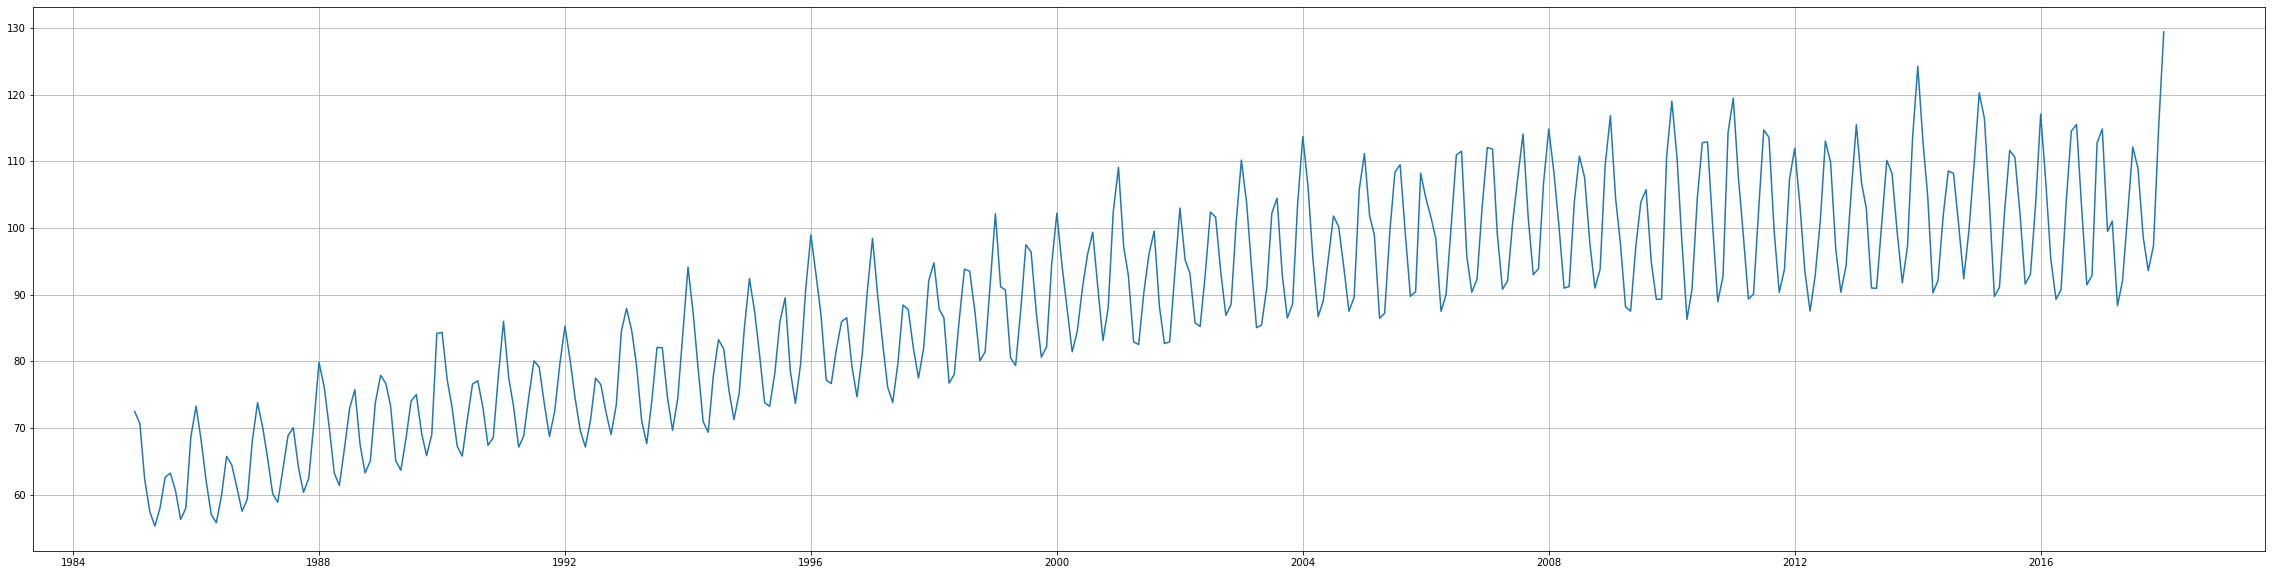

In [29]:
#Delimita o tamanho do Plot onde: (figsize= (l,a)) l=largura e a= altura do plot gráfico.
plt.figure(figsize=(40,10))
plt.plot(df)
plt.grid()
plt.show()

- Utilizando o Decompose para extrair seguintes dados: Observado, Média Móvel, Sazonalidade e ruído.

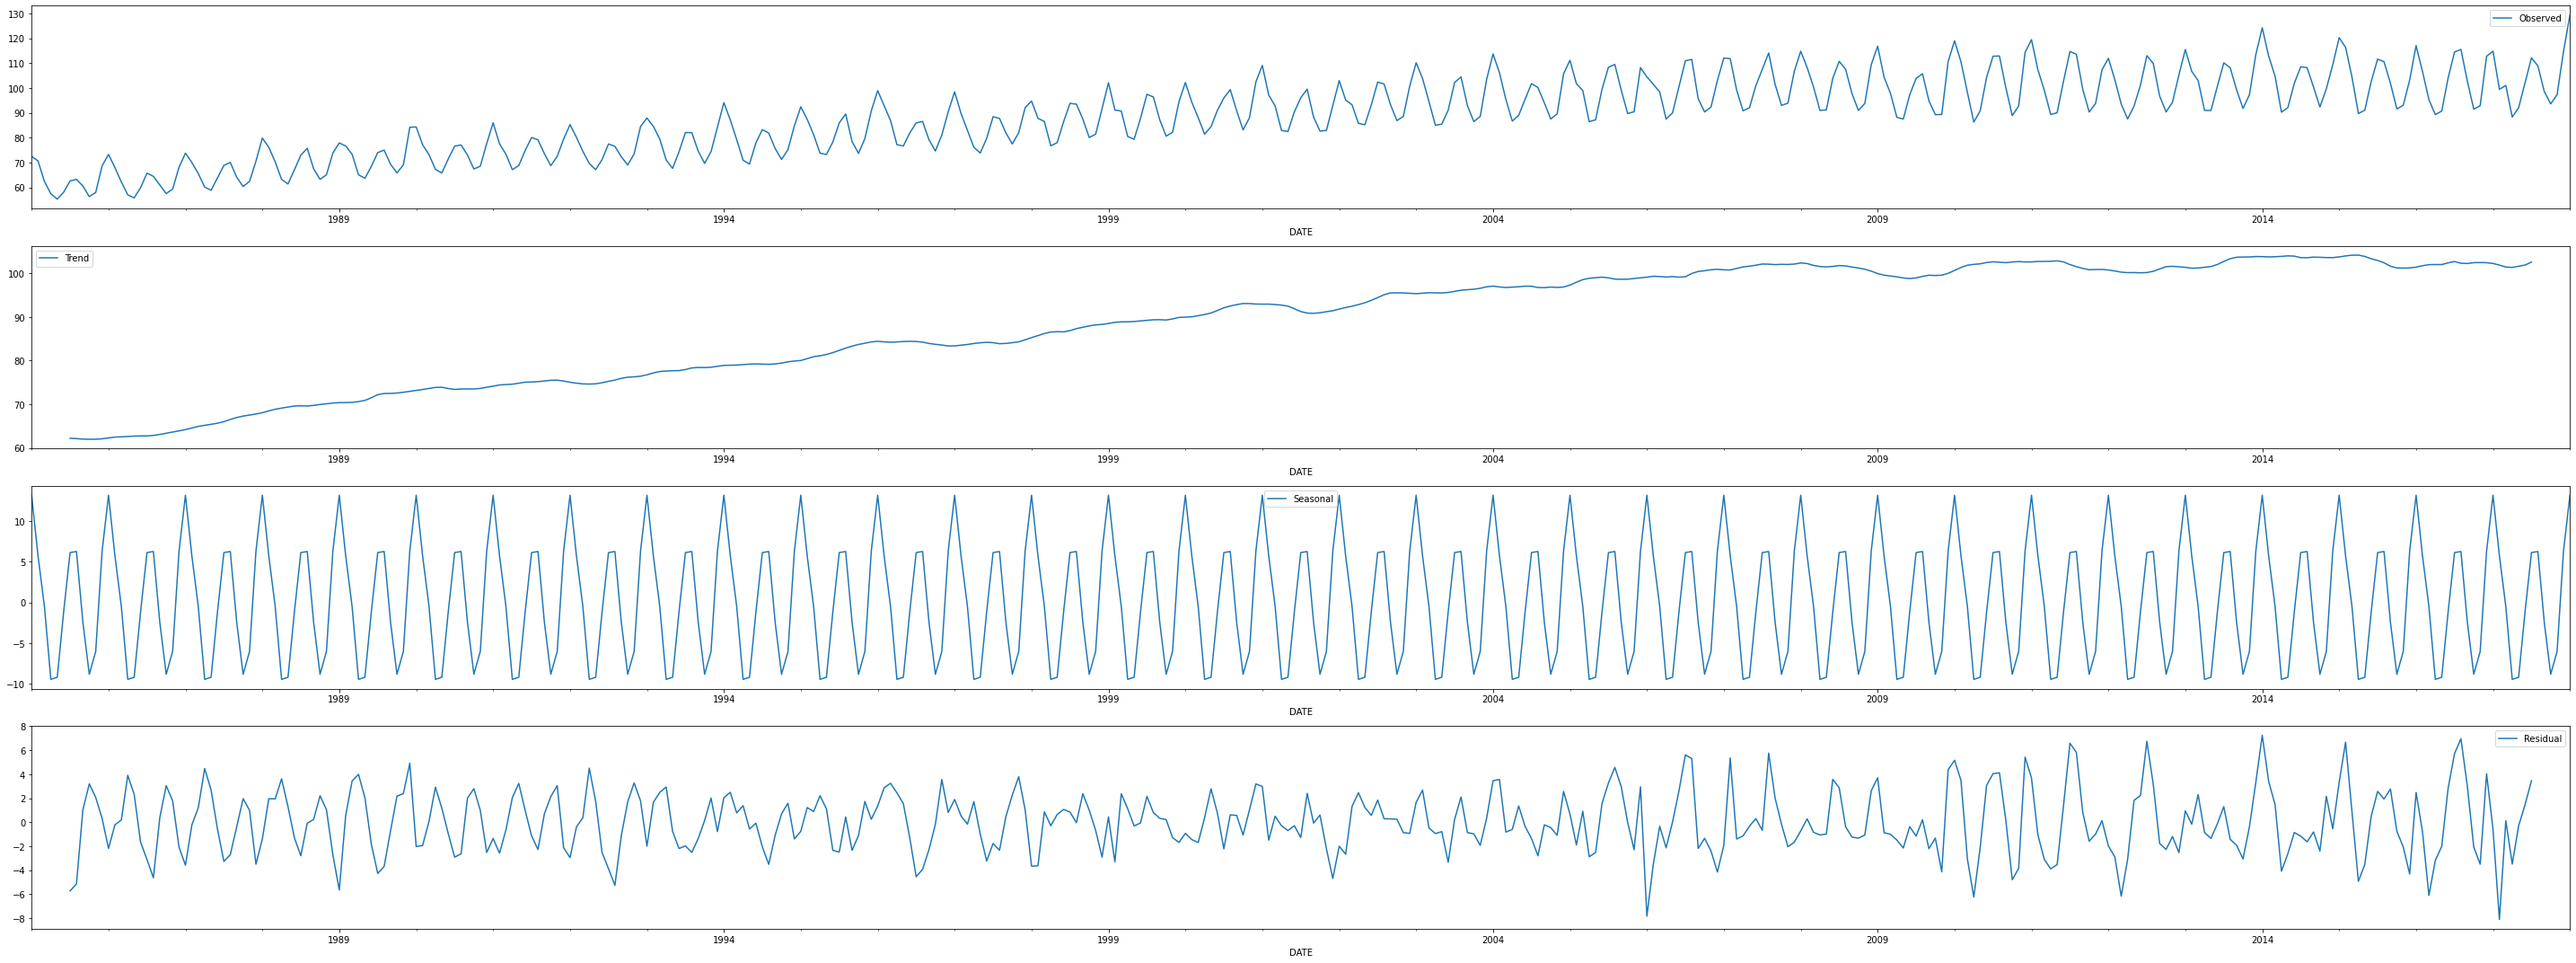

In [51]:
resultado = seasonal_decompose(df)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(40,15))

resultado.observed.plot(ax=ax1, legend=True, label="Observed")
resultado.trend.plot(ax=ax2, legend=True, label="Trend")
resultado.seasonal.plot(ax=ax3, legend=True, label="Seasonal")
resultado.resid.plot(ax=ax4, legend=True, label="Residual")

plt.tight_layout()

### Trabalhando outro DataSet
##### Companhia Ferroviária fictícia

- Leitura e primeira análise de dados

In [31]:
f_df = pd.read_csv('Data\jetrail.csv')

f_df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


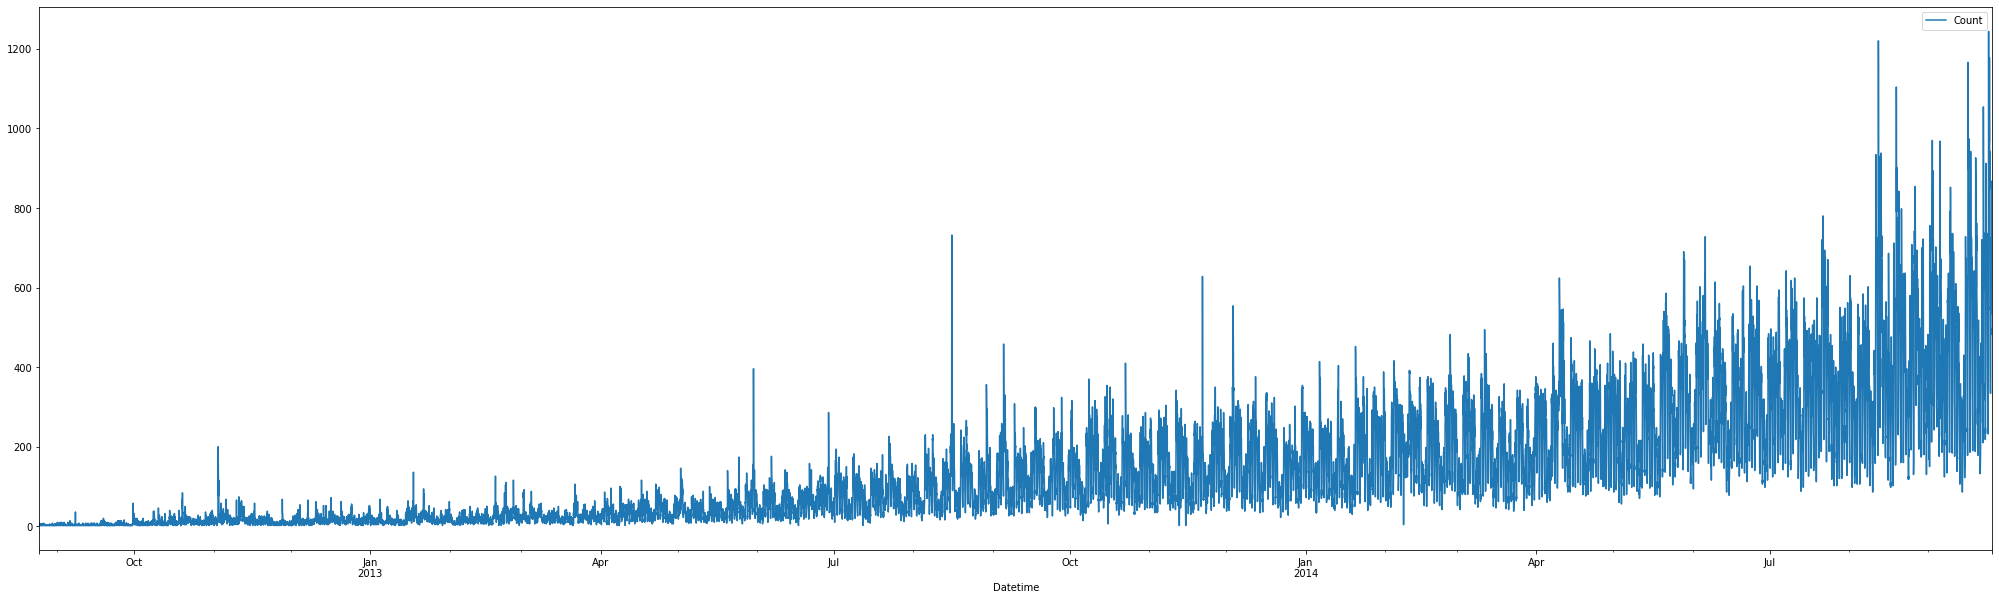

In [32]:
f_df["Datetime"] = pd.to_datetime(f_df["Datetime"], format="%d-%m-%Y %H:%M")

fig, ax = plt.subplots(figsize=(35,10))
f_df.plot(x='Datetime', y='Count', ax=ax);

In [38]:
# Separando DateTime em variáveis isoladas
f_df['year'] = f_df.Datetime.dt.year
f_df['month'] = f_df.Datetime.dt.month
f_df['day'] = f_df.Datetime.dt.day
f_df['hour'] = f_df.Datetime.dt.hour
f_df['day_of_week'] = f_df.Datetime.dt.day_of_week

#Verificando dias da semana
f_df['weekend'] = 0

f_df.loc[(f_df.day_of_week == 5) | (f_df.day_of_week == 6), 'weekend'] = 1

In [43]:
# Verificando diferênça de fluxo de passageiros no meio e no final de semana. Onde 0 são dias de semana e 1, finais de semana.
f_df.weekend.value_counts()

0    13056
1     5232
Name: weekend, dtype: int64

<AxesSubplot:xlabel='weekend'>

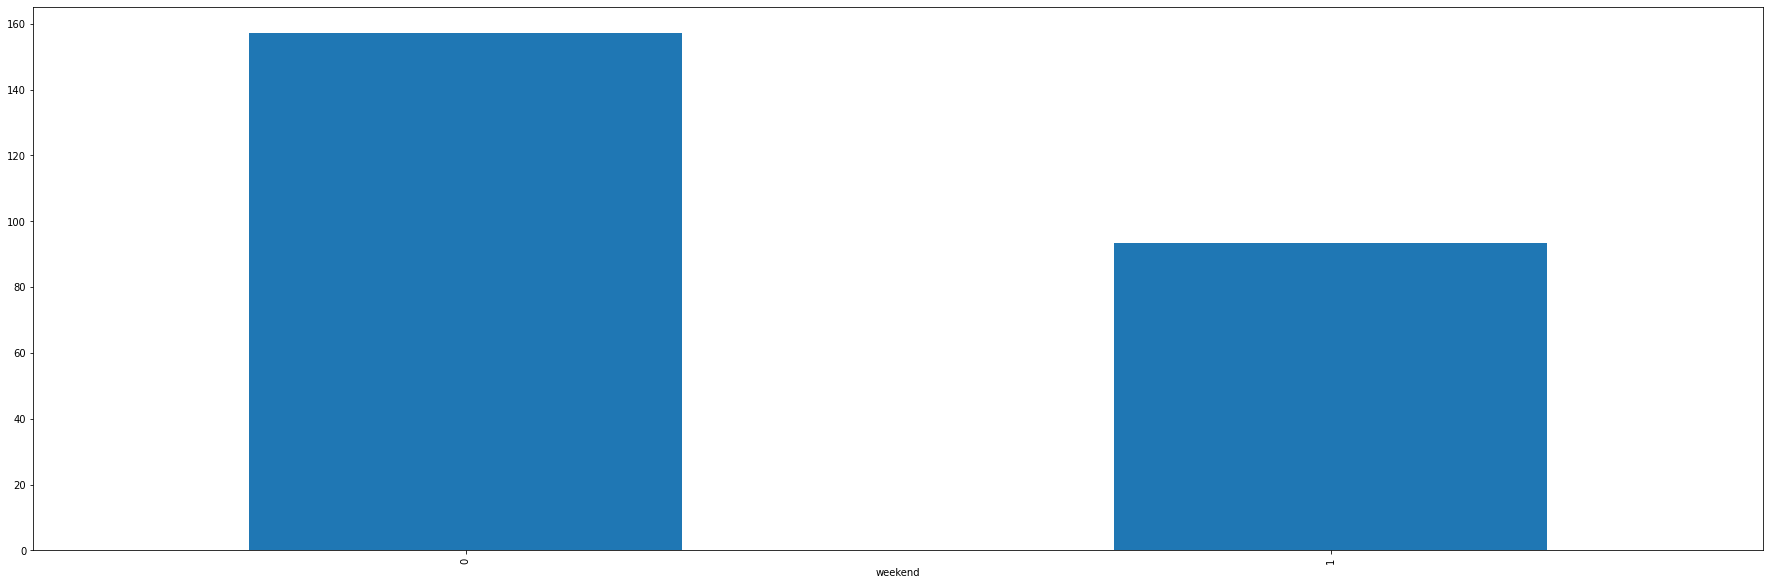

In [45]:
# Visualizando graficamente
f_df.groupby(by='weekend').Count.mean().plot.bar(figsize=(31,10))

##### ---Baseado no gráfico acima, fica claro que o número de passageiros que utilizam o serviço em dias de semana é maior do que os que o utilizam nos finais de semana

<AxesSubplot:xlabel='hour'>

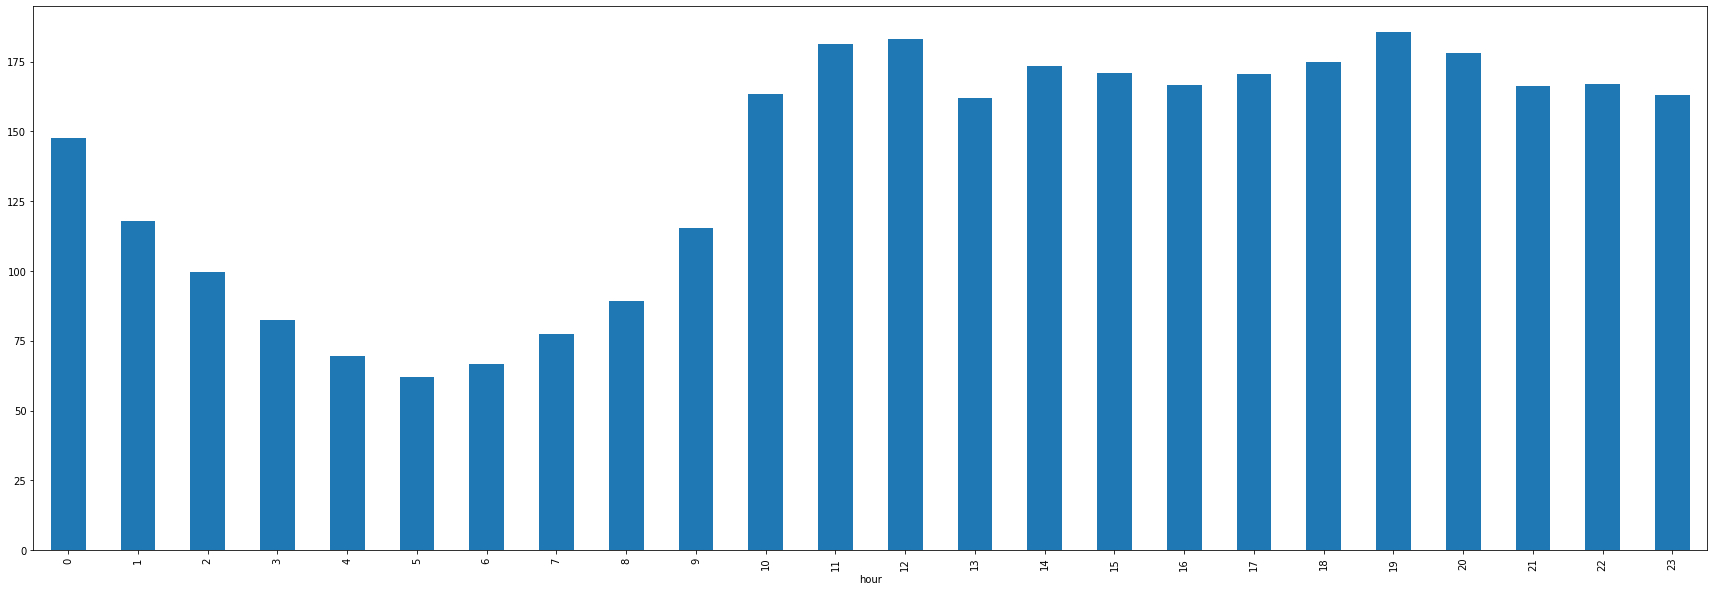

In [48]:
#Definindo horários de pico
f_df.groupby(by='hour').Count.mean().plot.bar(figsize=(30,10))

##### ----Denota-se que como horário de pico pode ser apontado como: De 11 às 12 horas, seguido de certa estabilidade também em alta até as 18 voltando a números mais altos por volta das 19 horas. Caindo signitificativamente após 1 hora.